In [2]:
# EDA --> Understand the data
# Data Cleaning --> Null values, Outliers
# Encoding --> Converting the object data type to numeric
# Label Encoding, One-hot Encoding
# VIF --> Variance Inflation Factor(Multicollinearity) --> 
# Import the libraries
# Train the model
# Test the model
# Accuracy score, classification Report

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # It will ignore all the warnings that appear after you execute a code

In [46]:
data=pd.read_csv('bank-additional-full.csv', sep=';') # utf encoding

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data['y'].value_counts()

y
no     36556
yes     4640
Name: count, dtype: int64

In [8]:
data.shape  # The no. of rows and columns present in the dataset

(41199, 21)

In [9]:
data.describe() # Statistical analylis

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
data.dtypes # data type of each and every column

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
data.shape

(41199, 21)

In [12]:
data.info() # total count of non-null values along with data type for each and evry column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [13]:
data['y'] # It will be my target variable

0         no
1         no
2         no
3         no
4         no
        ... 
41194     no
41195     no
41196     no
41197    NaN
41198     no
Name: y, Length: 41199, dtype: object

In [14]:
data['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [16]:
data['default'].value_counts()

default
no         32595
unknown     8597
yes            3
Name: count, dtype: int64

In [17]:
data['y'].value_counts()

y
no     36556
yes     4640
Name: count, dtype: int64

In [18]:
#extra step--> if needed skip it --> if yes-- 1 or no-- 0
data['y'] = np.where(data['y'] == 'yes',1,0)  # I replaced yes -> 1, no -> 0
data['y'] = data['y'].astype(str)

In [19]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [20]:
data['y'].tail()

41194    0
41195    0
41196    0
41197    0
41198    0
Name: y, dtype: object

In [21]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [23]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [24]:
data.isna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41195,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41196,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41197,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


In [25]:
data.isna().sum()

#isnull().sum()
#isna()---> check the null values
#sum()----> added and given the result

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [124]:
# Null values 
# dtype == object --> replace the null values with mode
# dtype == int/float --> replace the null values with mean/median
# If outliers are present --> Median
# If outliers are not present --> Mean
# 1  2  3  4  5  100
# mean = 115/6 --> 19.16
# 1 2 3 4 5
# mean = 15/5 --> 3

In [27]:
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41195.000000,41194,41194,41194,41195,41196,41195,41195,41196,41196,...,41196.000000,41196.000000,41196.000000,41194,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000,41199
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,10422,24934,12168,32595,21584,33957,26151,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36559
mean,40.030319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567676,962.482547,0.173124,NaN,0.081656,93.575867,-40.504600,3.620787,5166.996405,NaN
std,10.431818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.769751,186.893451,0.494987,NaN,1.570894,0.578999,4.629972,1.734655,72.300104,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [28]:
data['marital'].value_counts()

marital
married     24934
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [29]:
data['job'].mode() # An example to calculate the mode of a column

0    admin.
Name: job, dtype: object

In [30]:
import statistics as st

In [33]:
st.mode(data['job'])

'admin.'

In [45]:
# I just want the output to be the mode and nothing else
data['job'].mode()[0]

'admin.'

In [31]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41198,74.0,retired,married,professional.course,no,yes,NaN,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,NaN,-50.8,1.028,4963.6,0


In [32]:
data.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [129]:
#outliers

In [33]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [34]:
data.duplicated().sum()
# data = data.drop_duplicates()

np.int64(15)

<Axes: xlabel='age'>

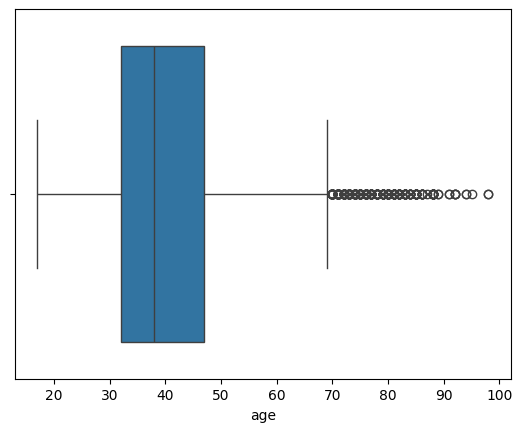

In [37]:
import seaborn as sns
sns.boxplot(x=data['age'])

In [38]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [39]:
col_list = list(data.columns)
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [40]:
import matplotlib.pyplot as plt

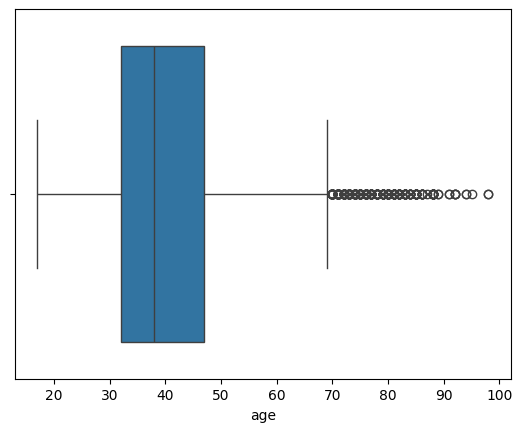

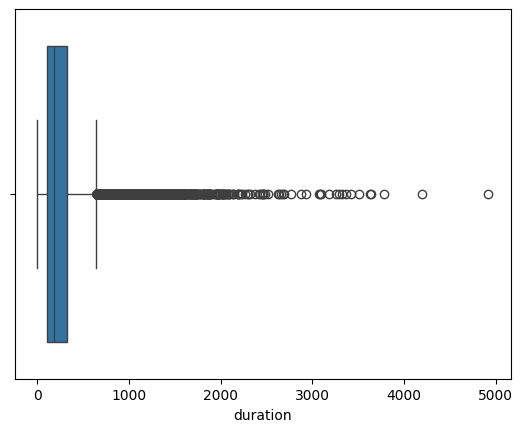

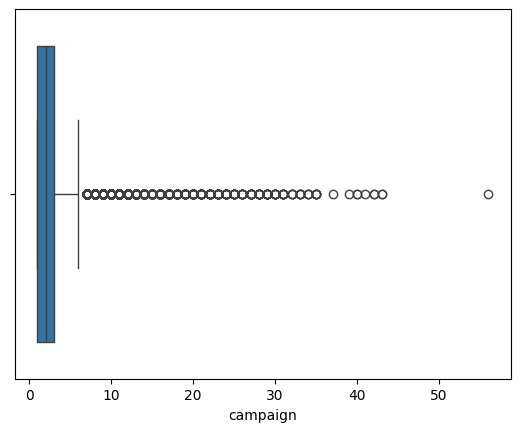

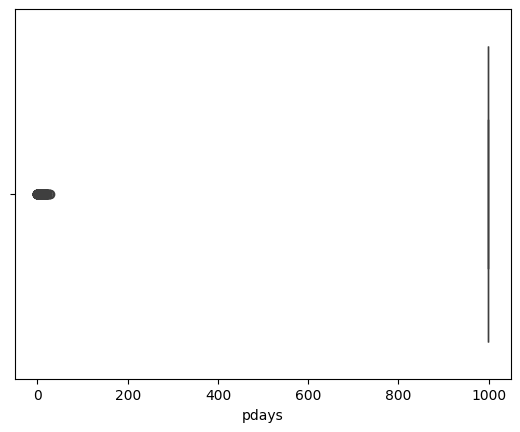

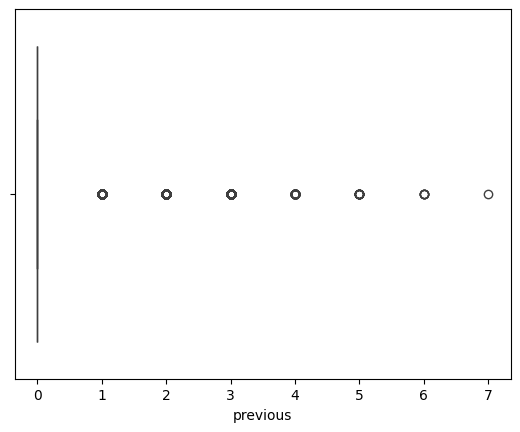

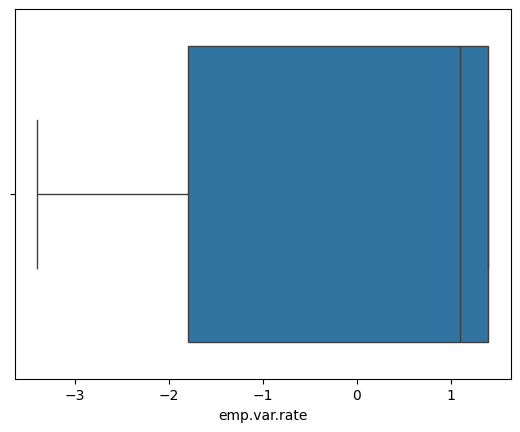

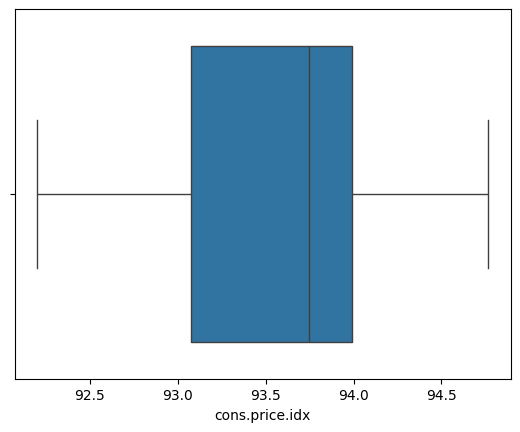

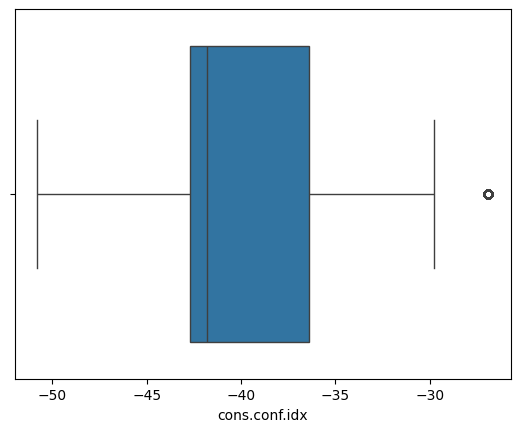

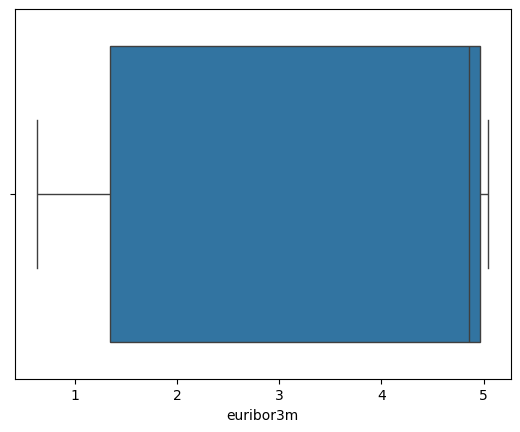

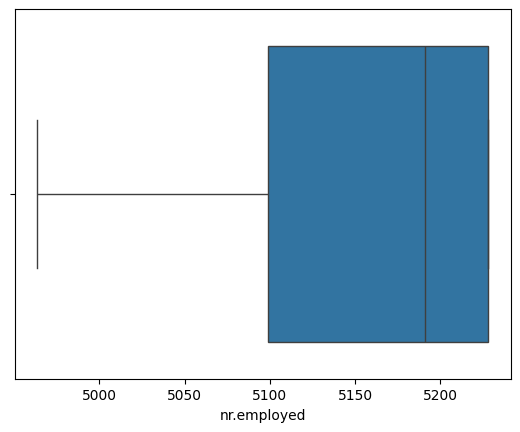

In [41]:
for i in col_list:
    if(data[i].dtype!='object'):
        plt.figure()
        sns.boxplot(x=data[i])

<AxesSubplot:xlabel='duration'>

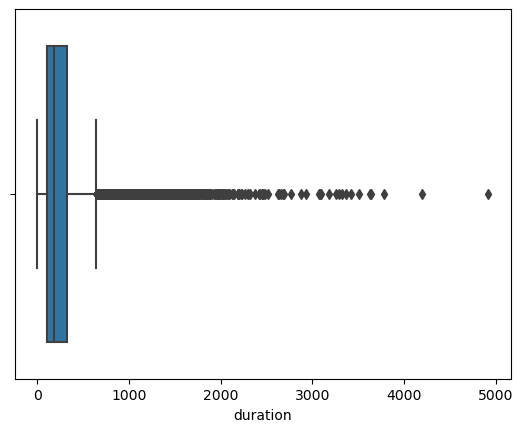

In [137]:
sns.boxplot(x=data['duration'])

In [42]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [139]:
# There are two ways for treating the outliers
# One way is to remove the outliers column-wise
# The second way is to remove the outliers all at once for every numerical column

In [47]:
# Gerneralised formula
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
type(IQR)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [44]:
Q1, Q3

NameError: name 'Q1' is not defined

In [142]:
# data = data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR)).any(axis =1)]
# Lower limit = Q1 - 1.5*IQR
# Upper Limit = Q3 + 1.5*IQR

In [ ]:
# a = [10,19,18]
# if ~(a<15)
# a<15 ==10
# ~ = 19,18

In [45]:
# ~ --> Negation operator --> It provides the exact opposite of the condition mentioned
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] # axis = 1 --> column wise
# axis = 0 --> row wise

NameError: name 'Q1' is not defined

In [144]:
d1 = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [145]:
d1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [146]:
a = int(input())
b = int(input())

ValueError: invalid literal for int() with base 10: ''

In [147]:
if(~(a==b)):
    print(True)
else:
    print(False)

NameError: name 'b' is not defined

In [48]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
data.shape  # Outliers are treated

(41199, 21)

In [50]:
data.columns  # fetch out all the column names present in the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [52]:
col_list = list(data.columns) #Type casting

In [53]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [54]:
col_list.remove('y')

In [55]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [56]:
data['age'].mode()[0]

np.float64(31.0)

In [57]:
for i in col_list:
    if data[i].dtypes=='object':
        #print('ob')
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        #print('num')
        data[i] = data[i].fillna(data[i].mean())
# If the column is a numeric column --> Reolace the null values with mean, if outliers are treated, otherwise
# replace with median

In [158]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [58]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [161]:
data['age'].shape

(30363,)

In [59]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431311,259.244772,2.769650,186.886646,0.494969,1.570836,0.578971,4.629804,1.734592,72.297472
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [60]:
data['age'].value_counts()

age
31.0    1947
32.0    1846
33.0    1833
36.0    1780
35.0    1759
        ... 
94.0       2
89.0       2
98.0       2
95.0       1
87.0       1
Name: count, Length: 79, dtype: int64

In [164]:
data['age'].min()

18.0

In [61]:
data['age'].max()

np.float64(98.0)

In [166]:
##Binning of Age##
# 10 15 25 50 75 
# 1-10-->  1,2,3,4,5,6,7,8,9
# 10-20->10, 15
# 20-30-> 25
# 50-80-> 50,75

# 10-20 10-20  20-30  50-80
#extra code
# data--> cat
# 10-25  25-50  50-100
# 10-25 --> 10 to 24
# 50-100 --> 50-99
bins = [10, 25, 50, 100]
data['age'] = pd.cut(data['age'], bins) # cut()--> for only binning purposes
data['age'] = data.age.astype(str)
# '10-25'  --> Label Encoding --> 0
# '25-50'  --> Label Encoding --> 1
# '50-100' --> Label Encoding --> 2

In [62]:
data['age'].unique() # all the unique values

array([56.        , 57.        , 37.        , 40.        , 45.        ,
       59.        , 41.        , 24.        , 25.        , 29.        ,
       35.        , 54.        , 46.        , 50.        , 39.        ,
       30.        , 55.        , 49.        , 34.        , 52.        ,
       58.        , 32.        , 38.        , 44.        , 42.        ,
       60.        , 53.        , 47.        , 51.        , 48.        ,
       33.        , 31.        , 43.        , 36.        , 28.        ,
       27.        , 26.        , 22.        , 23.        , 20.        ,
       21.        , 61.        , 19.        , 18.        , 70.        ,
       66.        , 76.        , 67.        , 73.        , 88.        ,
       95.        , 77.        , 68.        , 75.        , 63.        ,
       80.        , 62.        , 65.        , 72.        , 82.        ,
       64.        , 71.        , 69.        , 78.        , 85.        ,
       79.        , 83.        , 81.        , 74.        , 17.  

In [63]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [172]:
# Label encoding --> The object data is converted into numeric data
# the conversion values will be according to alphabetical order
# job --> 2, admin --> 0 , banker --> 1
# age 
# 10-25,  25-50,  50-100
#  0        1        2

In [64]:
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

In [65]:
col_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [68]:
# yes no --> 1 0
# male female --> 1 0
# We are performing label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col_list:
    data[i]=le.fit_transform(data[i]) # fit --> feed the data, transform --> convert the data into labels

In [178]:
# Labels are decided based upon their alphabetical order
# c, a, e, b, d
# a --> 0
# b --> 1
# c --> 2
# d --> 3
# e --> 4
# 2, 0, 4, 1, 3
#

In [179]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [180]:
# Linear Regression, Logistic Regression --> We have to pass only numbers

In [69]:
data['job'].value_counts()

job
0     10427
1      9254
9      6743
7      3969
4      2924
5      1726
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: count, dtype: int64

In [184]:
# Multicollinerity --> When we compare the relationship of all the columns with all the other columns at once
# VIF --> Variance Inflation Factor
# VIF helps us to reduce the multicollinearity among the independent variables
# VIF = 1 --> Variables are not multicorrelated
# VIF < 6 --> vARIABLES ARE MODERATELY multicorrelated --> Accepted
# VIF = More than 6 --> Variables are highly correlated, and we drop those columns

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

In [71]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [72]:
X=data[col_list]
X
#independent

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.000000,3,1,0,0,0,0,1,6,1,261.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
1,57.000000,7,1,3,1,0,0,1,6,1,149.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
2,37.000000,7,1,3,0,2,0,1,6,1,226.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
3,40.000000,0,1,1,0,0,0,1,6,1,151.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
4,56.000000,7,1,3,0,0,2,1,6,1,307.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.000000,5,1,5,0,2,0,0,7,0,239.000000,3.000000,999.000000,1.000000,0,-1.100000,94.767000,-50.8000,1.028000,4963.600000
41195,74.000000,0,1,5,0,2,0,0,7,0,239.000000,3.000000,999.000000,1.000000,0,-1.100000,94.767000,-50.8000,1.028000,4963.600000
41196,74.000000,5,1,6,0,2,0,0,7,0,239.000000,3.000000,999.000000,1.000000,0,-1.100000,94.767000,-50.8000,1.028000,4963.600000
41197,40.030319,0,1,6,0,2,0,0,6,2,258.281265,2.567676,962.482547,0.173124,1,0.081656,93.575867,-40.5046,3.620787,5166.996405


In [73]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [190]:
X.values

array([[ 2.00000000e+00,  3.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       [ 2.00000000e+00,  7.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       [ 1.00000000e+00,  7.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -4.04101186e+01,  3.97023870e+00,  5.18193237e+03],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -4.04101186e+01,  3.97023870e+00,  5.18193237e+03],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -4.04101186e+01,  3.97023870e+00,  5.18193237e+03]])

In [75]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor 
# # col_list = []
# # for col in data.columns:
# #     if ((data[col].dtype != 'object') & (col != 'y') ):
# #         col_list.append(col)

# #X = data[col_list]

vif_data = pd.DataFrame() # Creating a new data frame
vif_data["feature"] = X.columns # adding a column- feature which will contain all the column names
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,age,19.703497
1,job,2.120008
2,marital,5.654360
3,education,4.463458
4,default,1.404124
5,housing,2.206203
6,loan,1.207715
7,contact,2.838946
8,month,6.779441
9,day_of_week,3.084785


In [76]:
data=data.drop(['pdays'], axis = 1) # axis = 1 --> column-wise

In [77]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

           feature           VIF
0              age     19.703142
1              job      2.119937
2          marital      5.654351
3        education      4.463207
4          default      1.404122
5          housing      2.206049
6             loan      1.207679
7          contact      2.838909
8            month      6.779420
9      day_of_week      3.084785
10        duration      2.016230
11        campaign      1.930442
12        previous      1.752086
13        poutcome      9.240735
14    emp.var.rate     40.216973
15  cons.price.idx  37261.471369
16   cons.conf.idx    131.475811
17       euribor3m    330.837305
18     nr.employed  42867.742927


In [78]:
data=data.drop(['nr.employed'], axis = 1)

In [79]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

           feature         VIF
0              age   19.647673
1              job    2.119702
2          marital    5.653075
3        education    4.462564
4          default    1.400809
5          housing    2.205637
6             loan    1.207614
7          contact    2.394055
8            month    5.774497
9      day_of_week    3.084278
10        duration    2.011685
11        campaign    1.926716
12        previous    1.647394
13        poutcome    8.946522
14    emp.var.rate   23.140482
15  cons.price.idx  383.766530
16   cons.conf.idx  110.363664
17       euribor3m  130.340740


In [80]:
data=data.drop(['cons.price.idx'], axis = 1)

In [81]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

          feature        VIF
0             age  17.458846
1             job   2.110243
2         marital   5.378120
3       education   4.363040
4         default   1.400769
5         housing   2.201447
6            loan   1.207177
7         contact   2.255728
8           month   5.703286
9     day_of_week   3.058727
10       duration   2.003931
11       campaign   1.922509
12       previous   1.482795
13       poutcome   8.010034
14   emp.var.rate  12.416104
15  cons.conf.idx  36.160515
16      euribor3m  59.572390


In [82]:
data=data.drop(['euribor3m'], axis = 1)

In [83]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

          feature        VIF
0             age  14.660659
1             job   2.103166
2         marital   5.151494
3       education   4.190772
4         default   1.400655
5         housing   2.193459
6            loan   1.206757
7         contact   2.248305
8           month   5.208254
9     day_of_week   3.016941
10       duration   2.001403
11       campaign   1.922276
12       previous   1.462293
13       poutcome   7.851064
14   emp.var.rate   1.562936
15  cons.conf.idx  27.080173


In [84]:
data=data.drop(['cons.conf.idx'], axis = 1)

In [85]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

         feature       VIF
0            age  9.731095
1            job  2.096194
2        marital  4.262116
3      education  4.052252
4        default  1.398053
5        housing  2.152730
6           loan  1.202868
7        contact  2.229752
8          month  4.855171
9    day_of_week  2.951200
10      duration  1.974145
11      campaign  1.876742
12      previous  1.459139
13      poutcome  7.491188
14  emp.var.rate  1.562658


In [86]:
data=data.drop(['previous','poutcome'], axis = 1)  # Removing the columns because of Nan as the VIF

In [87]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

         feature       VIF
0            age  7.909037
1            job  2.090325
2        marital  3.999166
3      education  3.966943
4        default  1.397472
5        housing  2.145415
6           loan  1.202321
7        contact  2.209273
8          month  4.807414
9    day_of_week  2.923024
10      duration  1.955260
11      campaign  1.870723
12  emp.var.rate  1.385684


In [95]:
#data.to_csv('C:\\Users\\lenovo\\Downloads\\new_data.csv')
#export csv file to the system

In [88]:
vif_data.feature

0              age
1              job
2          marital
3        education
4          default
5          housing
6             loan
7          contact
8            month
9      day_of_week
10        duration
11        campaign
12    emp.var.rate
Name: feature, dtype: object

In [89]:
Ind_Features = list(vif_data.feature)
Ind_Features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [90]:
df_ind = data[Ind_Features]  # All the truly independent columns 
df_ind

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,56.000000,3,1,0,0,0,0,1,6,1,261.000000,1.000000,1.100000
1,57.000000,7,1,3,1,0,0,1,6,1,149.000000,1.000000,1.100000
2,37.000000,7,1,3,0,2,0,1,6,1,226.000000,1.000000,1.100000
3,40.000000,0,1,1,0,0,0,1,6,1,151.000000,1.000000,1.100000
4,56.000000,7,1,3,0,0,2,1,6,1,307.000000,1.000000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.000000,5,1,5,0,2,0,0,7,0,239.000000,3.000000,-1.100000
41195,74.000000,0,1,5,0,2,0,0,7,0,239.000000,3.000000,-1.100000
41196,74.000000,5,1,6,0,2,0,0,7,0,239.000000,3.000000,-1.100000
41197,40.030319,0,1,6,0,2,0,0,6,2,258.281265,2.567676,0.081656


In [91]:
df_dep = data['y']
df_dep

0         no
1         no
2         no
3         no
4         no
        ... 
41194     no
41195     no
41196     no
41197    NaN
41198     no
Name: y, Length: 41199, dtype: object

In [93]:
df_ind.dtypes

age             float64
job               int64
marital           int64
education         int64
default           int64
housing           int64
loan              int64
contact           int64
month             int64
day_of_week       int64
duration        float64
campaign        float64
emp.var.rate    float64
dtype: object

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.25, random_state=100)
# random state --> Select the data based upon the pattern

In [95]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
4933,32.0,7,1,3,1,2,0,1,6,4,127.0,2.0,1.1
39489,80.0,5,0,0,0,2,2,0,0,4,654.0,2.0,-1.8
11798,51.0,4,1,6,1,0,0,1,4,0,13.0,10.0,1.4
25692,43.0,0,2,3,0,0,0,0,7,4,1011.0,1.0,-0.1
20079,44.0,9,1,5,1,2,0,0,1,1,147.0,1.0,1.4


In [223]:
x_train.shape

(22772, 13)

In [224]:
x_test.shape

(7591, 13)

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
logisticRegr = LogisticRegression()

In [227]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [228]:
test_pred = logisticRegr.predict(x_test)

In [229]:
test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [111]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
8772,1,1,1,0,0,0,0,1,4,2,636.0,1.0,1.4
4146,1,1,1,0,0,0,2,1,6,1,114.0,2.0,1.1
22632,2,4,1,6,0,0,0,0,1,0,511.0,3.0,1.4
7347,1,9,2,6,0,2,0,1,6,0,57.0,2.0,1.1
13183,1,0,2,3,0,0,0,0,3,4,127.0,1.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1,1,1,1,0,0,0,1,6,2,126.0,3.0,1.1
35206,1,5,1,3,0,2,0,0,6,0,237.0,2.0,-1.8
10567,2,1,1,2,1,0,0,1,4,3,72.0,1.0,1.4
11425,1,0,1,6,0,0,0,1,4,0,45.0,1.0,1.4


In [230]:
test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [232]:
pd.DataFrame(logisticRegr.predict_proba(x_test))

,0,1
0,0.841220,0.158780
1,0.994753,0.005247
2,0.940026,0.059974
3,0.996527,0.003473
4,0.991455,0.008545
...,...,...
7586,0.993867,0.006133
7587,0.857221,0.142779
7588,0.998903,0.001097
7589,0.990064,0.009936


In [114]:
# Classification model --> accuracy_score(), confusion matrix, classification report

In [233]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [234]:
'''
Predicted   P	N
                1  0
                y  n
Actual  1  Py 	TP	FN
        0 Nn  	FP	TN
          
          #Sensitivity=TP/TP+FN  # pREDICTION --> tRUE, 1
          #Specificity=TN/TN+FP    pREDICTION --> tRUE, 0
'''  # accuracy ---> (  TP+TN)/(Total)

'\nPredicted   P\tN\n                1  0\n                y  n\nActual  1  Py \tTP\tFN\n        0 Nn  \tFP\tTN\n          \n          #Sensitivity=TP/TP+FN  # pREDICTION --> tRUE, 1\n          #Specificity=TN/TN+FP    pREDICTION --> tRUE, 0\n'

In [235]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[7121,   89],
       [ 315,   66]], dtype=int64)

In [ ]:
# 7121 --> TN, 89 --> FN, 315 --> FP, 66 --> TP

In [239]:
7121/(7121+315)

0.957638515330823

In [119]:
(7095+68)/(7093+72+357+69)
# indirect way of finding accuracy

0.9436174417072849

In [251]:
sen=c1[0,0]/(c1[0,0]+c1[1,0])  # TN/TN+TP
sen
# how much % the model predected correct data
# 95% the model has predicted correctly
#1---1
#0---0

0.957638515330823

In [252]:
accuracy_score(y_test,test_pred)

0.946779080490054

In [240]:
# pRECISION --> Correct prediction --> TP/TP+FP --> specificity
# Recall --> Only the actual positive predictions --> TP/TP+FN   --> Sensitivity
# F1-score --> Average of recall and precision
# Support --> The count of occurence

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7210
           1       0.43      0.17      0.25       381

    accuracy                           0.95      7591
   macro avg       0.69      0.58      0.61      7591
weighted avg       0.93      0.95      0.94      7591



In [245]:
# (0.43+0.17)/2
(2*(0.43*0.17))/(0.43+0.17) # Harmonic mean

0.24366666666666667

In [246]:
data['y'].value_counts()

0    28708
1     1655
Name: y, dtype: int64

In [249]:
test_pred1 = pd.Series(test_pred)

In [96]:
test_pred1.value_counts()

NameError: name 'test_pred1' is not defined

In [ ]:
100 --> 0, 100 --> 1
170 --> 0, 30 --> 1